In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation/BigML_Dataset_5f50a4cc0d052e40e6000034.csv


In [3]:
import pandas as pd
df = pd.read_csv('../input/solar-power-generation/BigML_Dataset_5f50a4cc0d052e40e6000034.csv')
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

In [5]:
df.describe()

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,183.334247,2008.665753,6.526027,15.720548,11.500000,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,105.769919,0.471807,3.448442,8.797754,6.875041,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,2008.000000,4.000000,8.000000,6.250000,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,2009.000000,7.000000,16.000000,11.500000,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,2009.000000,10.000000,23.000000,16.750000,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,366.000000,2009.000000,12.000000,31.000000,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [6]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [10]:
numerical_columns

Index(['Day of Year', 'Year', 'Month', 'Day', 'First Hour of Period',
       'Distance to Solar Noon', 'Average Temperature (Day)',
       'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover',
       'Visibility', 'Relative Humidity', 'Average Wind Speed (Period)',
       'Average Barometric Pressure (Period)', 'Power Generated'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

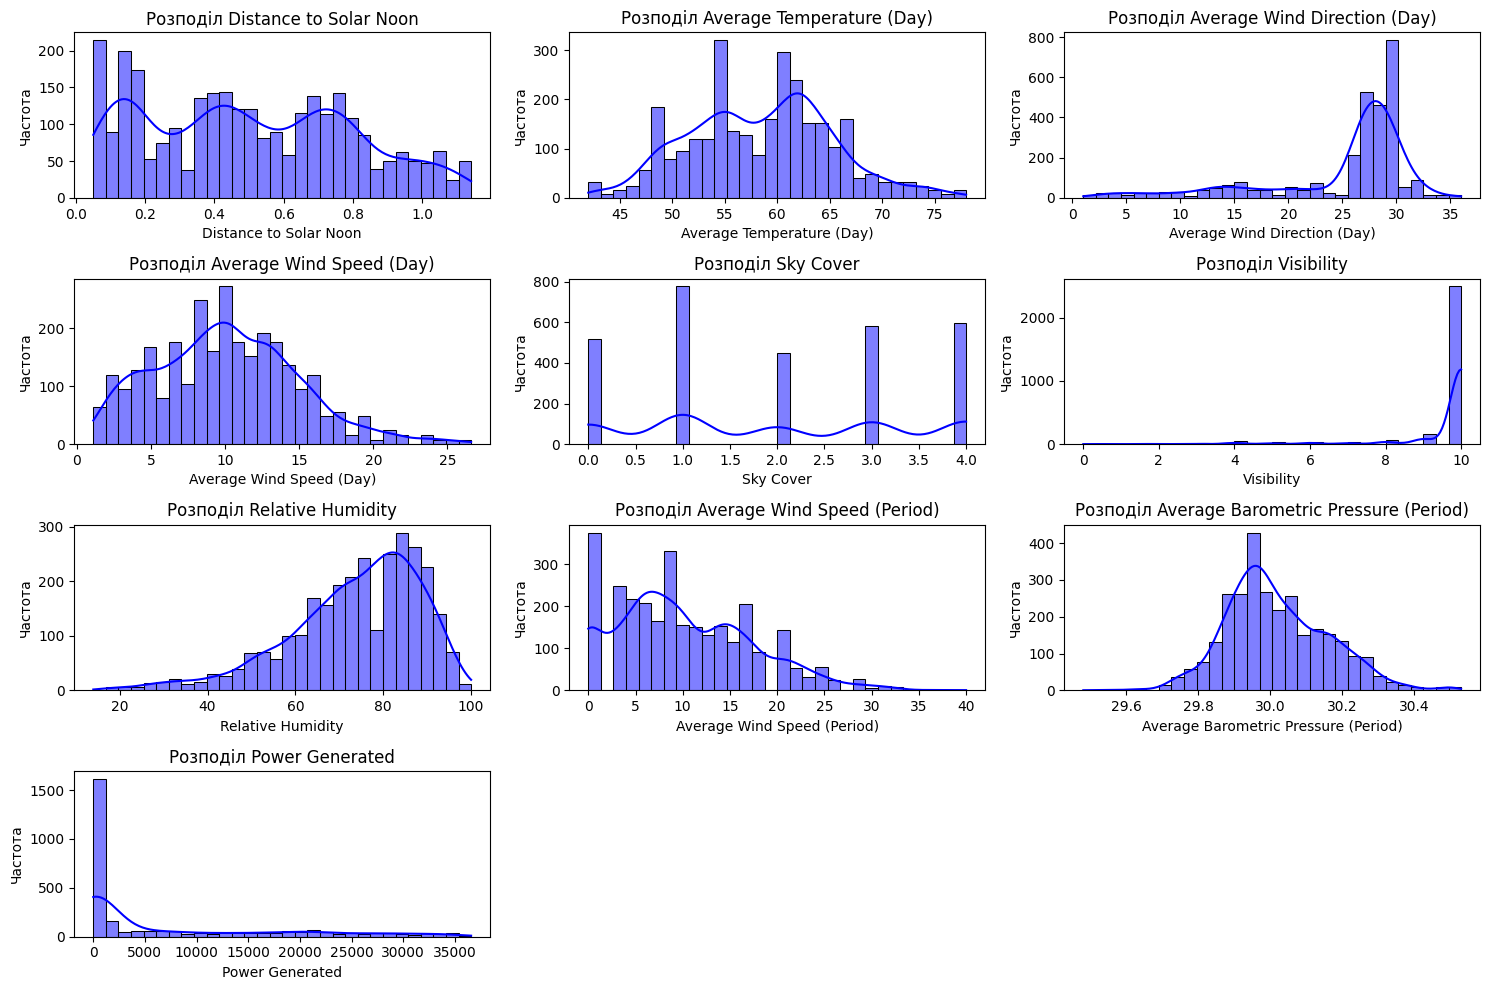

In [14]:
columns_to_remove = ['Day of Year', 'Year', 'Month', 'Day', 'First Hour of Period']

numerical_columns = [col for col in numerical_columns if col not in columns_to_remove]

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

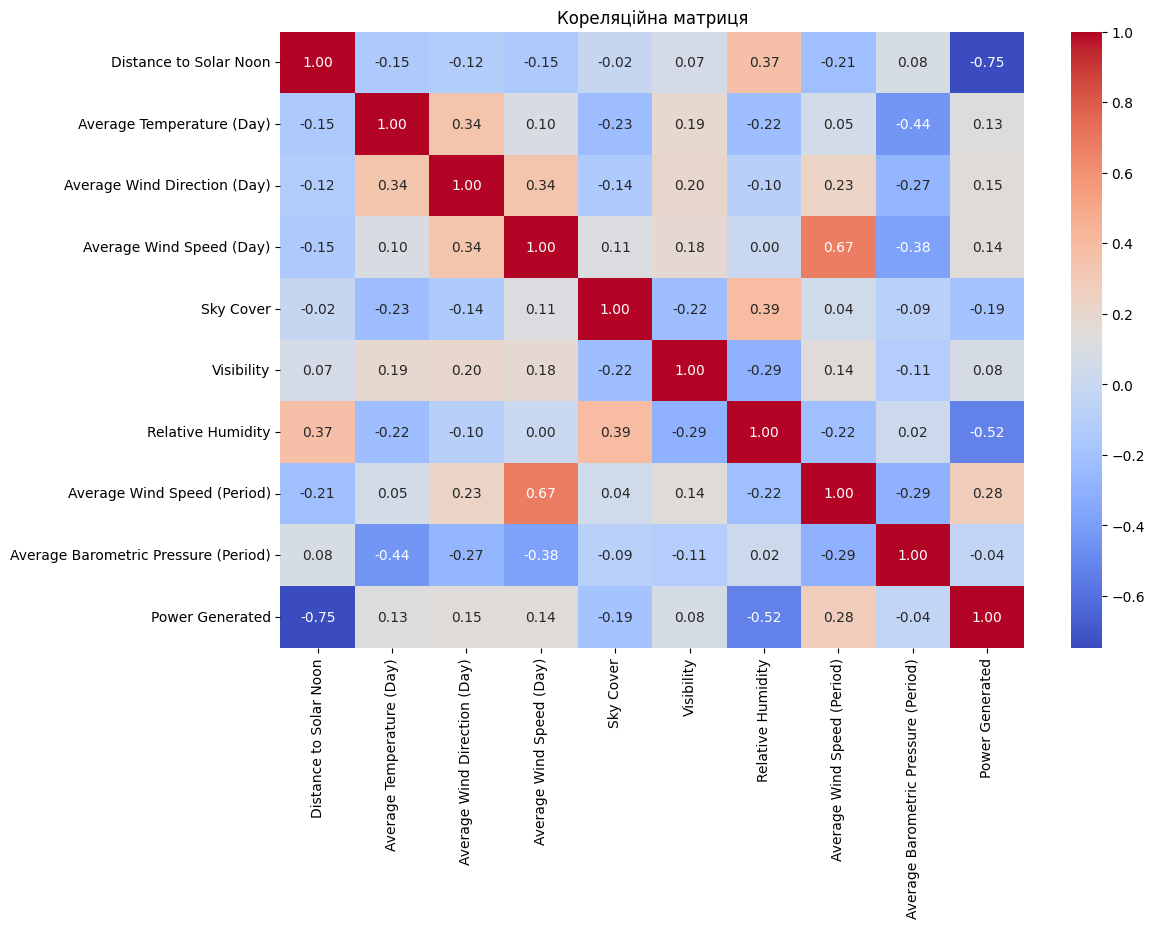

In [16]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Кореляційна матриця")
plt.show()

In [17]:
df['Timestamp'] = pd.to_datetime(
    df[['Year', 'Month', 'Day', 'First Hour of Period']].rename(
        columns={'First Hour of Period': 'Hour'}
    )
)

In [18]:
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

In [21]:
df.head()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Timestamp,,,,,,,,,,
2008-09-01 01:00:00,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
2008-09-01 04:00:00,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2008-09-01 07:00:00,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
2008-09-01 10:00:00,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2008-09-01 13:00:00,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [20]:
columns_to_remove = ['Day of Year', 'Year', 'Month', 'Day', 'First Hour of Period', 'Is Daylight']

# Drop columns
df = df.drop(columns=columns_to_remove)

In [22]:
df.head()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Timestamp,,,,,,,,,,
2008-09-01 01:00:00,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
2008-09-01 04:00:00,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2008-09-01 07:00:00,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
2008-09-01 10:00:00,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2008-09-01 13:00:00,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [42]:
df_augmented = pd.concat([df, df, df, df], axis=0)

In [43]:
df_reset = df_augmented.reset_index(drop=True)

In [44]:
df_augmented

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-01 01:00:00,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
2017-09-01 04:00:00,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2017-09-01 07:00:00,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
2017-09-01 10:00:00,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2017-09-01 13:00:00,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2018-08-31 10:00:00,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2018-08-31 13:00:00,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2018-08-31 16:00:00,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2018-08-31 19:00:00,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [45]:
new_index = pd.date_range(start='2017-09-01 01:00:00', periods=len(df_augmented), freq='3H')

new_index

/tmp/ipykernel_30/1790640332.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start='2017-09-01 01:00:00', periods=len(df_augmented), freq='3H')


DatetimeIndex(['2017-09-01 01:00:00', '2017-09-01 04:00:00',
               '2017-09-01 07:00:00', '2017-09-01 10:00:00',
               '2017-09-01 13:00:00', '2017-09-01 16:00:00',
               '2017-09-01 19:00:00', '2017-09-01 22:00:00',
               '2017-09-02 01:00:00', '2017-09-02 04:00:00',
               ...
               '2021-08-29 19:00:00', '2021-08-29 22:00:00',
               '2021-08-30 01:00:00', '2021-08-30 04:00:00',
               '2021-08-30 07:00:00', '2021-08-30 10:00:00',
               '2021-08-30 13:00:00', '2021-08-30 16:00:00',
               '2021-08-30 19:00:00', '2021-08-30 22:00:00'],
              dtype='datetime64[ns]', length=11680, freq='3h')

In [46]:
df_augmented.index = new_index

In [47]:
df_augmented

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-01 01:00:00,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
2017-09-01 04:00:00,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2017-09-01 07:00:00,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
2017-09-01 10:00:00,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
2017-09-01 13:00:00,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2021-08-30 10:00:00,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2021-08-30 13:00:00,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2021-08-30 16:00:00,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2021-08-30 19:00:00,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [52]:
noise = np.random.normal(0, 100, df_augmented["Power Generated"].shape)
df_augmented["Power Generated"] += noise

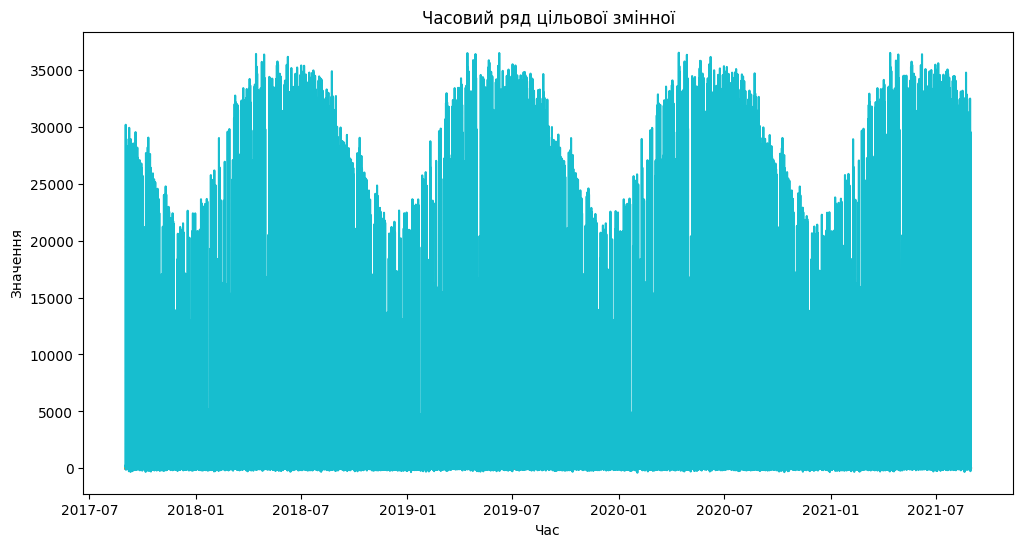

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df_augmented)
plt.title('Часовий ряд цільової змінної')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.show()

In [54]:
time_series = df_augmented['Power Generated']
time_series

2017-09-01 01:00:00      219.400519
2017-09-01 04:00:00      104.020891
2017-09-01 07:00:00     5509.415363
2017-09-01 10:00:00    25516.477206
2017-09-01 13:00:00    30176.849640
                           ...     
2021-08-30 10:00:00     6928.439014
2021-08-30 13:00:00    29525.411418
2021-08-30 16:00:00    17204.626220
2021-08-30 19:00:00      743.750726
2021-08-30 22:00:00      127.040909
Freq: 3h, Name: Power Generated, Length: 11680, dtype: float64

/tmp/ipykernel_30/2970745276.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_augmented.resample('M').sum()
/tmp/ipykernel_30/2970745276.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df_augmented.resample('Y').sum()


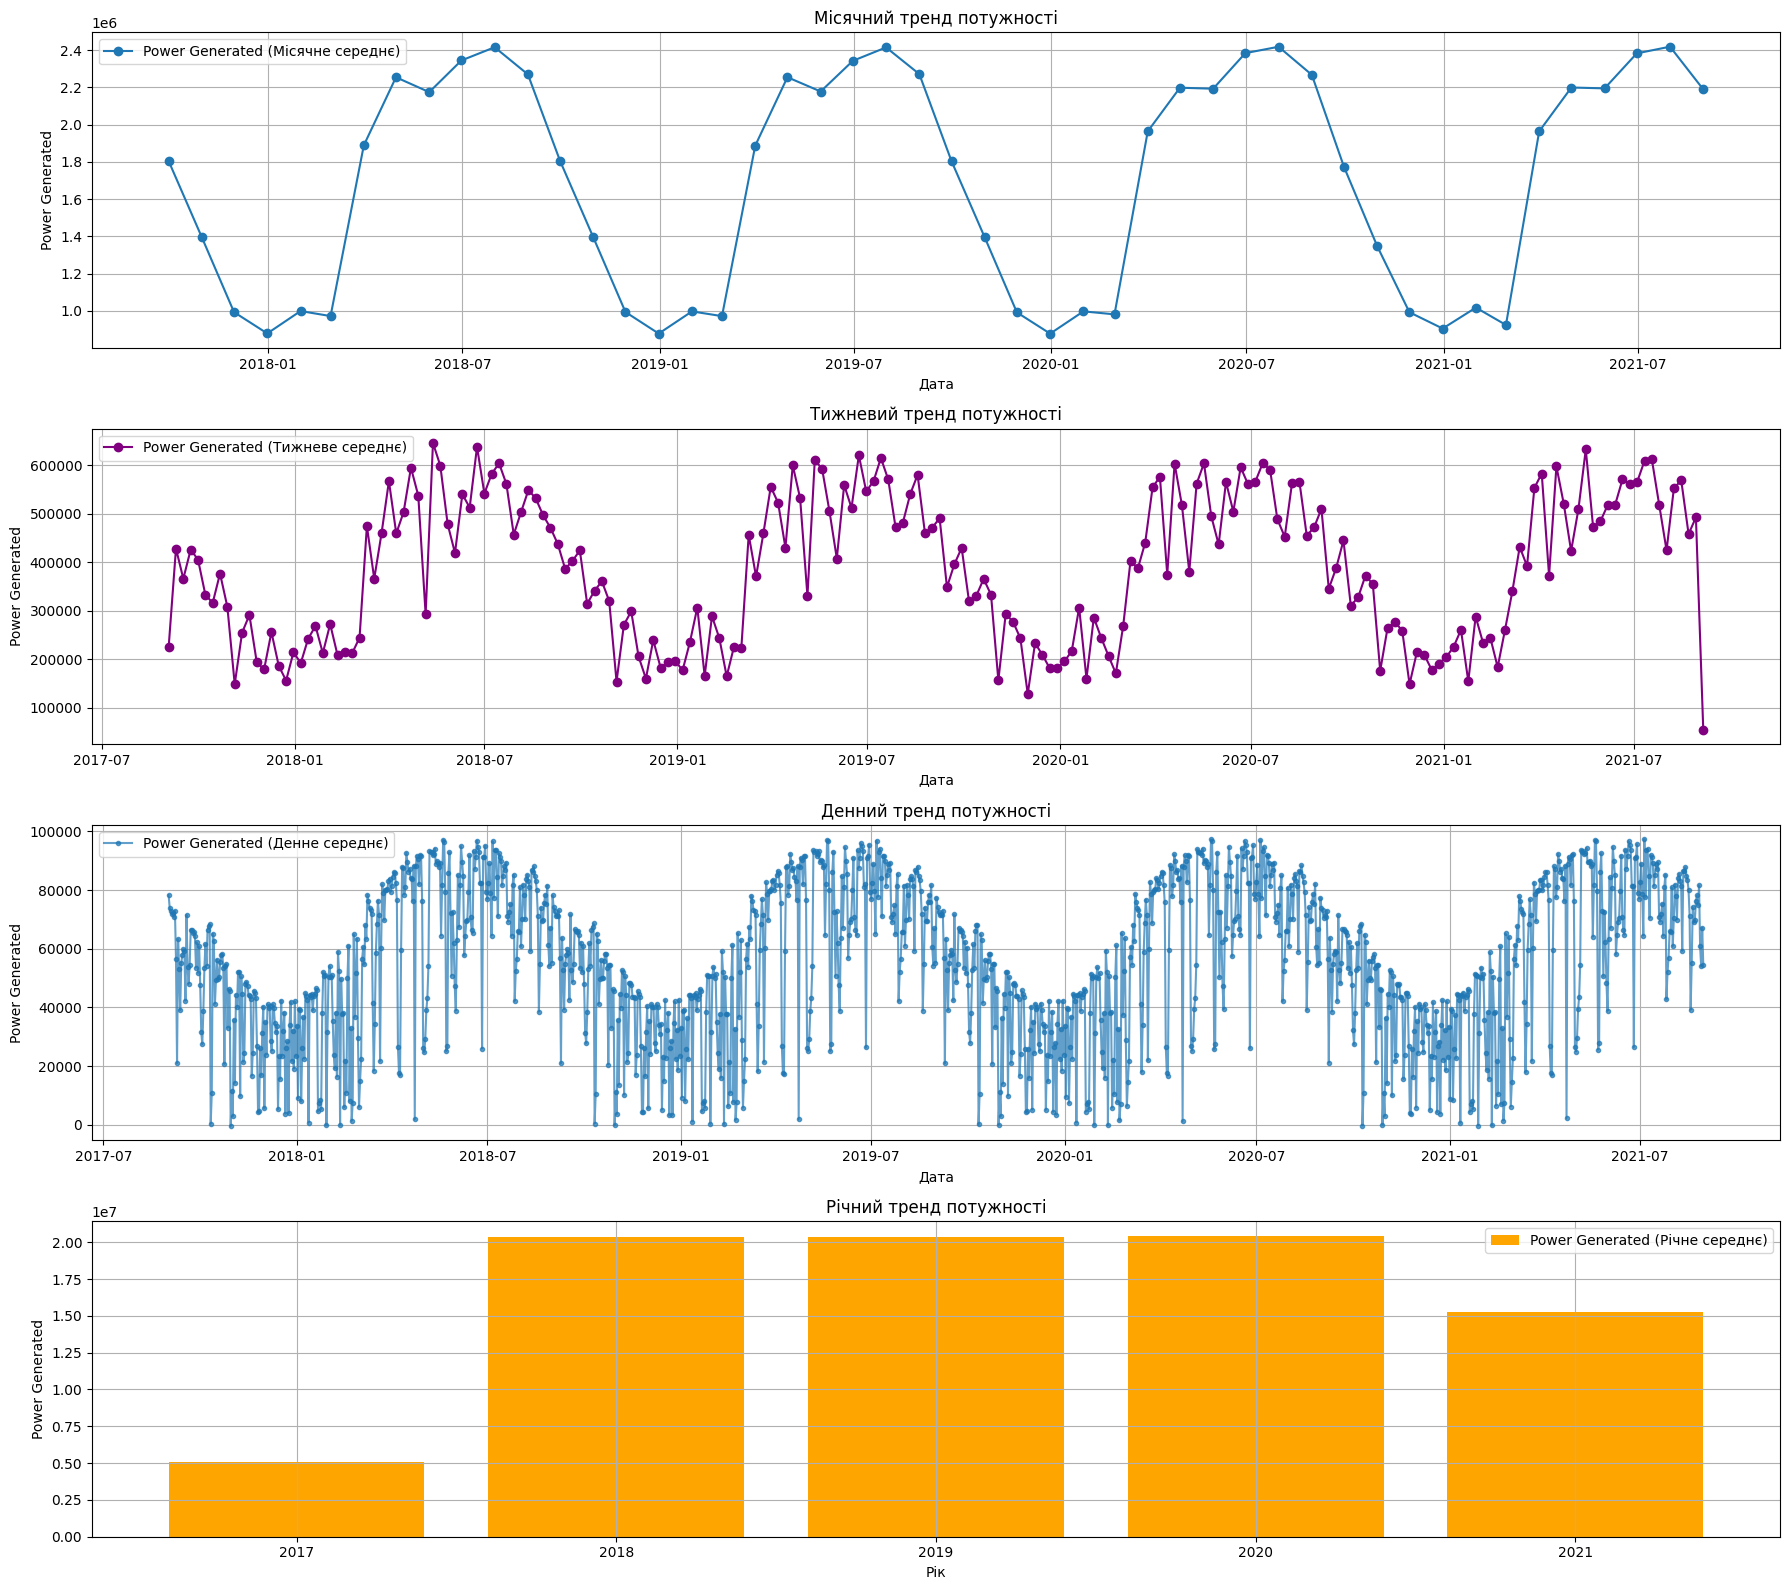

In [56]:
monthly_data = df_augmented.resample('M').sum()
weekly_data = df_augmented.resample('W').sum()
daily_data = df_augmented.resample('D').sum()
yearly_data = df_augmented.resample('Y').sum()

plt.figure(figsize=(18, 16))

column = 'Power Generated'

plt.subplot(4, 1, 1)
plt.plot(monthly_data.index, monthly_data[column], marker='o', label=f'{column} (Місячне середнє)')
plt.title('Місячний тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(weekly_data.index, weekly_data[column], marker='o', color='purple', label=f'{column} (Тижневе середнє)')
plt.title('Тижневий тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(daily_data.index, daily_data[column], marker='.', label=f'{column} (Денне середнє)', alpha=0.7)
plt.title('Денний тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.bar(yearly_data.index.year, yearly_data[column], color='orange', label=f'{column} (Річне середнє)')
plt.title('Річний тренд потужності')
plt.xlabel('Рік')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

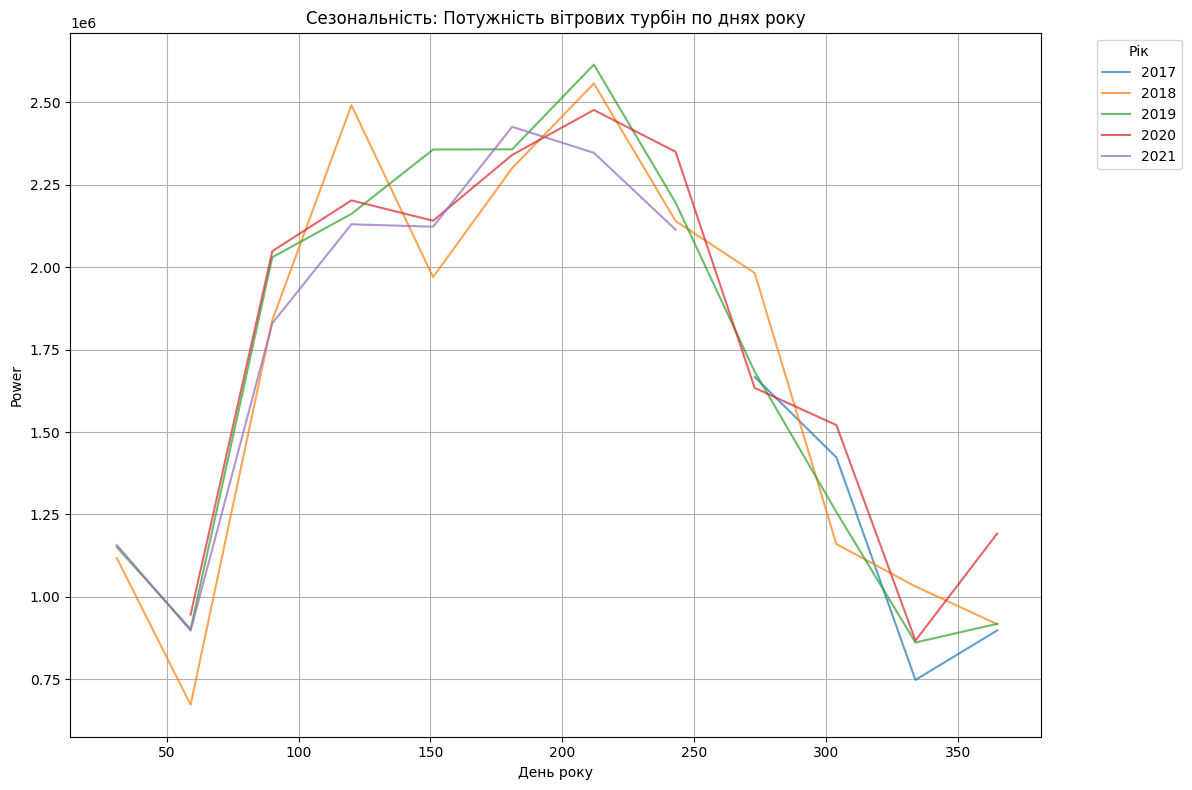

In [70]:
temp = monthly_data.copy()
temp['DayOfYear'] = temp.index.dayofyear
temp['Year'] = temp.index.year

temp.loc[temp.index.year == 2020, 'DayOfYear'] = temp.loc[temp.index.year == 2020, 'DayOfYear'] - 1

# Групування даних за днем року та роками
seasonal_data = temp.groupby(['DayOfYear', 'Year'])['Power Generated'].mean().unstack()

# Побудова графіка
plt.figure(figsize=(12, 8))

# Додавання кожного року на графік
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], label=str(year), alpha=0.7)

# Оформлення графіка
plt.title('Сезональність: Потужність вітрових турбін по днях року')
plt.xlabel('День року')
plt.ylabel('Power')
plt.legend(title='Рік', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
from scipy.stats import zscore

test_df = weekly_data

outliers = {}
for column in numerical_columns:
    z_scores = zscore(test_df[column])
    outliers[column] = test_df[column][abs(z_scores) > 3]

for column, outlier_values in outliers.items():
    print(f"Колонка: {column}")
    print(f"Аутлаєри:\n{outlier_values}")
    print("-" * 50)

Колонка: Distance to Solar Noon
Аутлаєри:
2017-09-03    11.138884
2021-09-05     3.687580
Name: Distance to Solar Noon, dtype: float64
--------------------------------------------------
Колонка: Average Temperature (Day)
Аутлаєри:
2017-09-03    1712
2021-09-05     504
Name: Average Temperature (Day), dtype: int64
--------------------------------------------------
Колонка: Average Wind Direction (Day)
Аутлаєри:
2018-01-14    456
2019-01-13    392
2020-01-12    424
2021-01-10    384
2021-09-05    216
Name: Average Wind Direction (Day), dtype: int64
--------------------------------------------------
Колонка: Average Wind Speed (Day)
Аутлаєри:
Series([], Freq: W-SUN, Name: Average Wind Speed (Day), dtype: float64)
--------------------------------------------------
Колонка: Sky Cover
Аутлаєри:
Series([], Freq: W-SUN, Name: Sky Cover, dtype: int64)
--------------------------------------------------
Колонка: Visibility
Аутлаєри:
2017-09-03    240.0
2021-09-05     80.0
Name: Visibility, dtype:

In [20]:
!pip install statsmodels

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(time_series)
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")

if adf_test[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.948272805572705
p-value: 2.8064680385105062e-05
Critical Values: {'1%': -3.432611613600796, '5%': -2.862539228682693, '10%': -2.5673019179781917}
The time series is stationary (p-value <= 0.05).


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/pyth

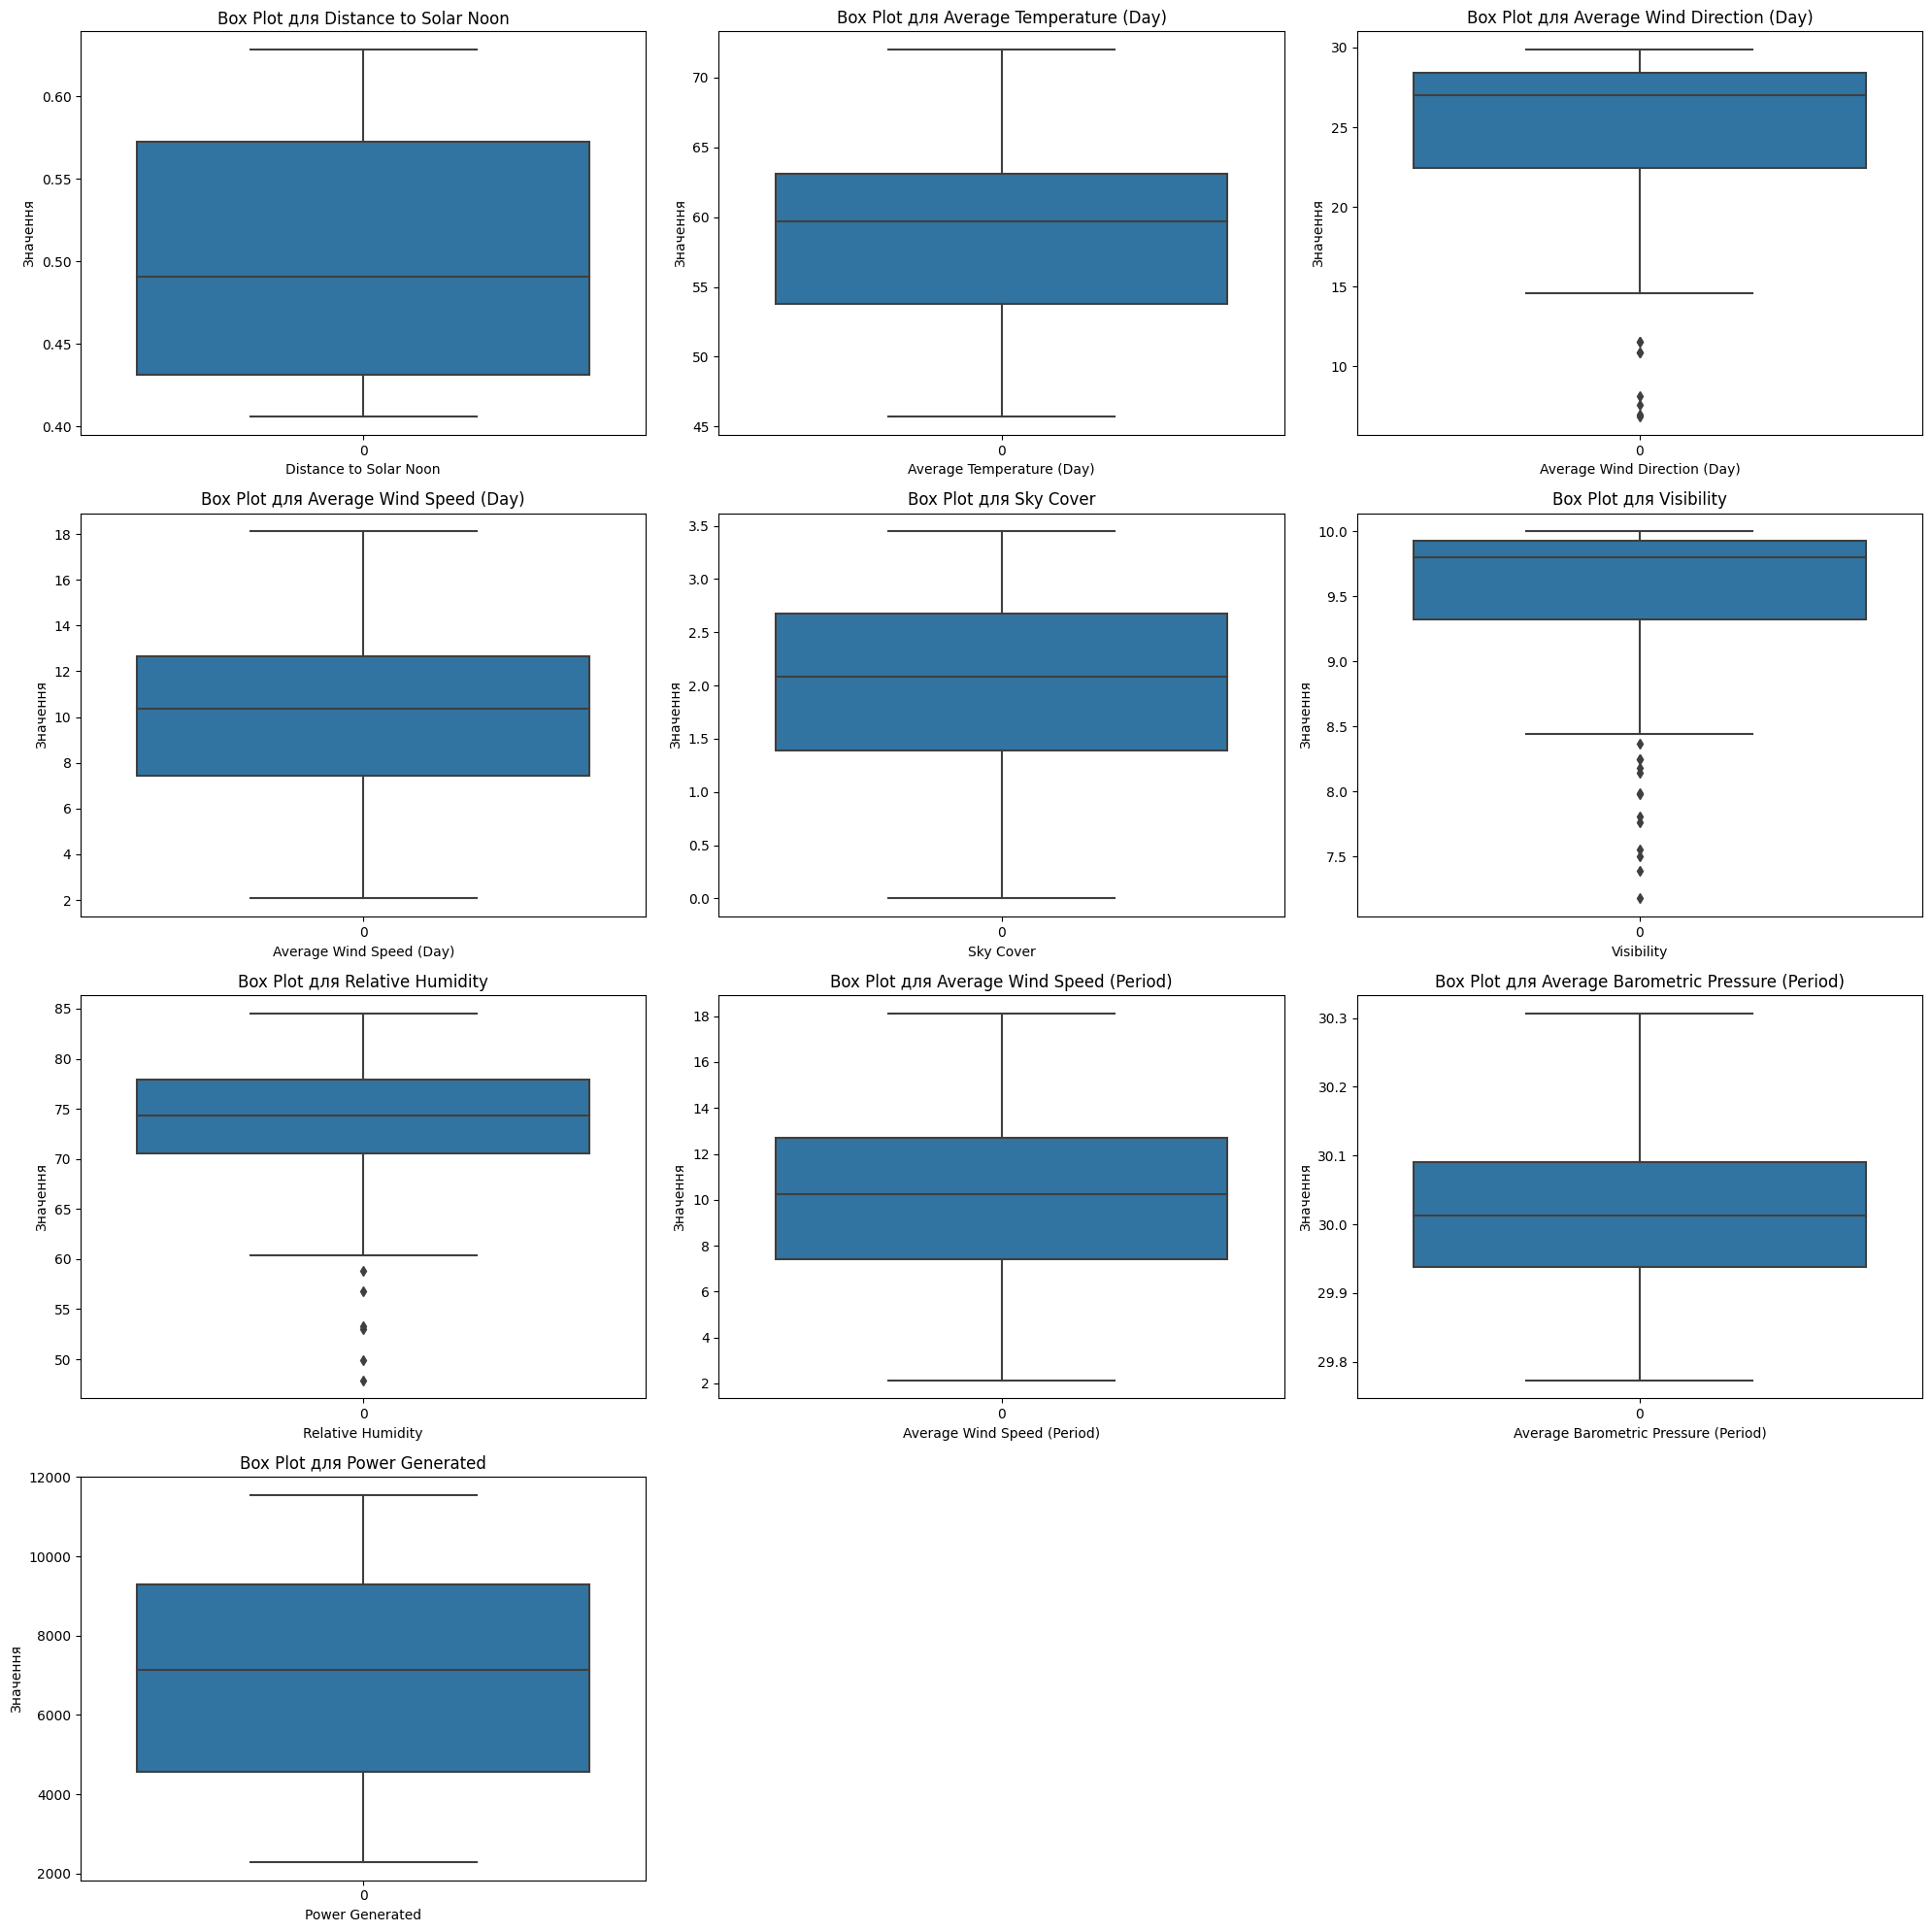

In [79]:
data = df_augmented.resample('W').mean()

plt.figure(figsize=(20, 20))
for i, col in enumerate(df_augmented.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot для {col}')
    plt.xlabel(col)
    plt.ylabel('Значення')

plt.tight_layout()
plt.show()

In [80]:
data

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-03,0.464120,71.333333,28.666667,7.400000,0.000000,10.000000,53.041667,7.250000,29.859583,9370.453453
2017-09-10,0.471312,68.714286,28.285714,9.271429,1.178571,9.964286,66.517857,9.303571,29.773571,7653.809034
2017-09-17,0.481946,60.714286,27.857143,11.014286,2.357143,9.803571,76.964286,11.017857,29.934286,6542.781556
2017-09-24,0.493075,64.571429,27.000000,9.428571,1.428571,9.946429,72.017857,9.321429,29.973571,7610.068432
2017-10-01,0.504731,64.714286,29.000000,9.214286,1.464286,9.964286,74.500000,9.160714,29.943393,7248.902460
...,...,...,...,...,...,...,...,...,...,...
2021-08-08,0.431148,66.285714,27.571429,12.285714,2.000000,9.821429,73.482143,12.017857,29.993571,9872.875095
2021-08-15,0.438654,67.428571,29.000000,13.171429,1.232143,9.964286,71.553571,13.071429,29.947143,10165.210707
2021-08-22,0.446823,63.714286,28.857143,11.728571,2.089286,9.875000,77.232143,11.535714,29.876250,8188.300658
2021-08-29,0.455795,67.142857,28.571429,10.657143,1.857143,9.772321,70.750000,10.839286,29.939464,8800.572278


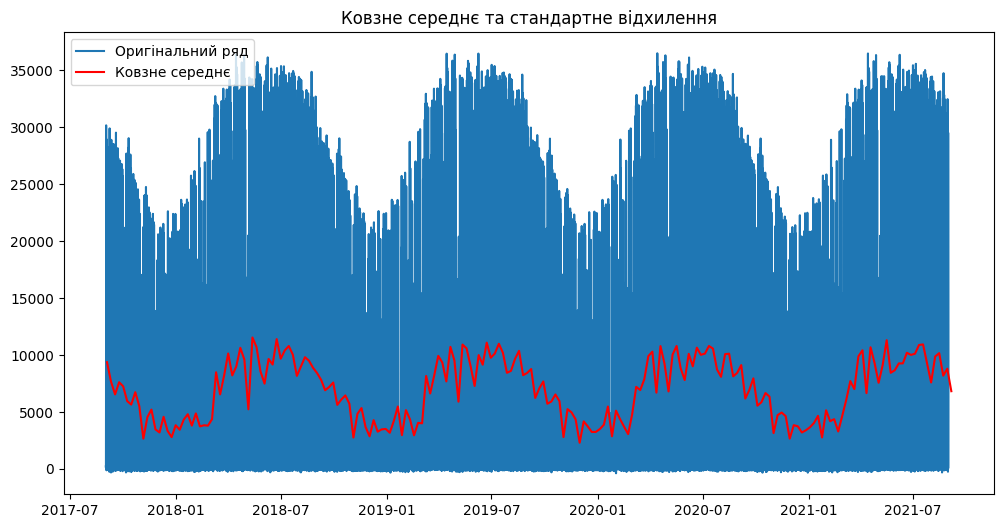

In [86]:
rolling_mean = data['Power Generated'].rolling(window=1).mean()
rolling_std = data['Power Generated'].rolling(window=1).std()

plt.figure(figsize=(12, 6))
plt.plot(df_augmented['Power Generated'], label='Оригінальний ряд')
plt.plot(rolling_mean, label='Ковзне середнє', color='red')
#plt.plot(rolling_std, label='Ковзне стандартне відхилення', color='green')
plt.title('Ковзне середнє та стандартне відхилення')
plt.legend()
plt.show()

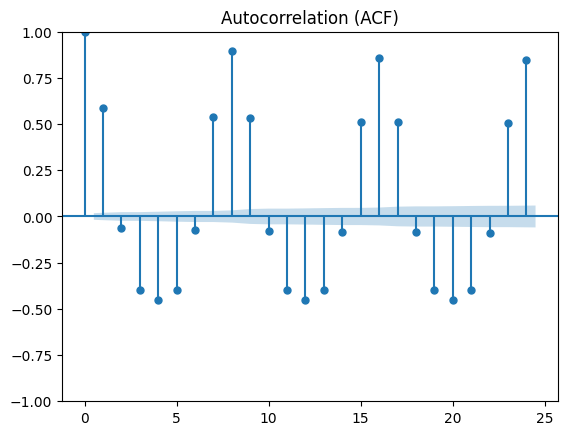

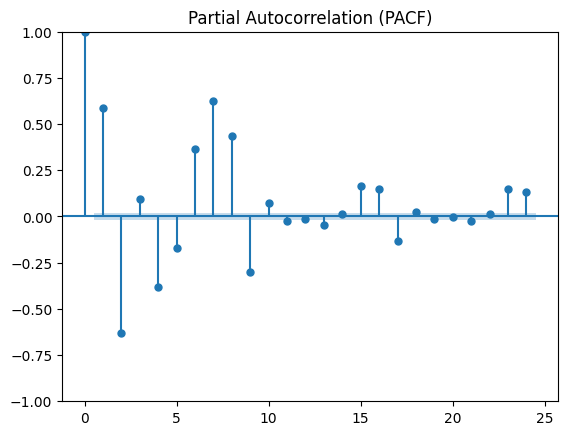

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
plot_acf(time_series, lags=24)
plt.title('Autocorrelation (ACF)')
plt.show()

plot_pacf(time_series, lags=24)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

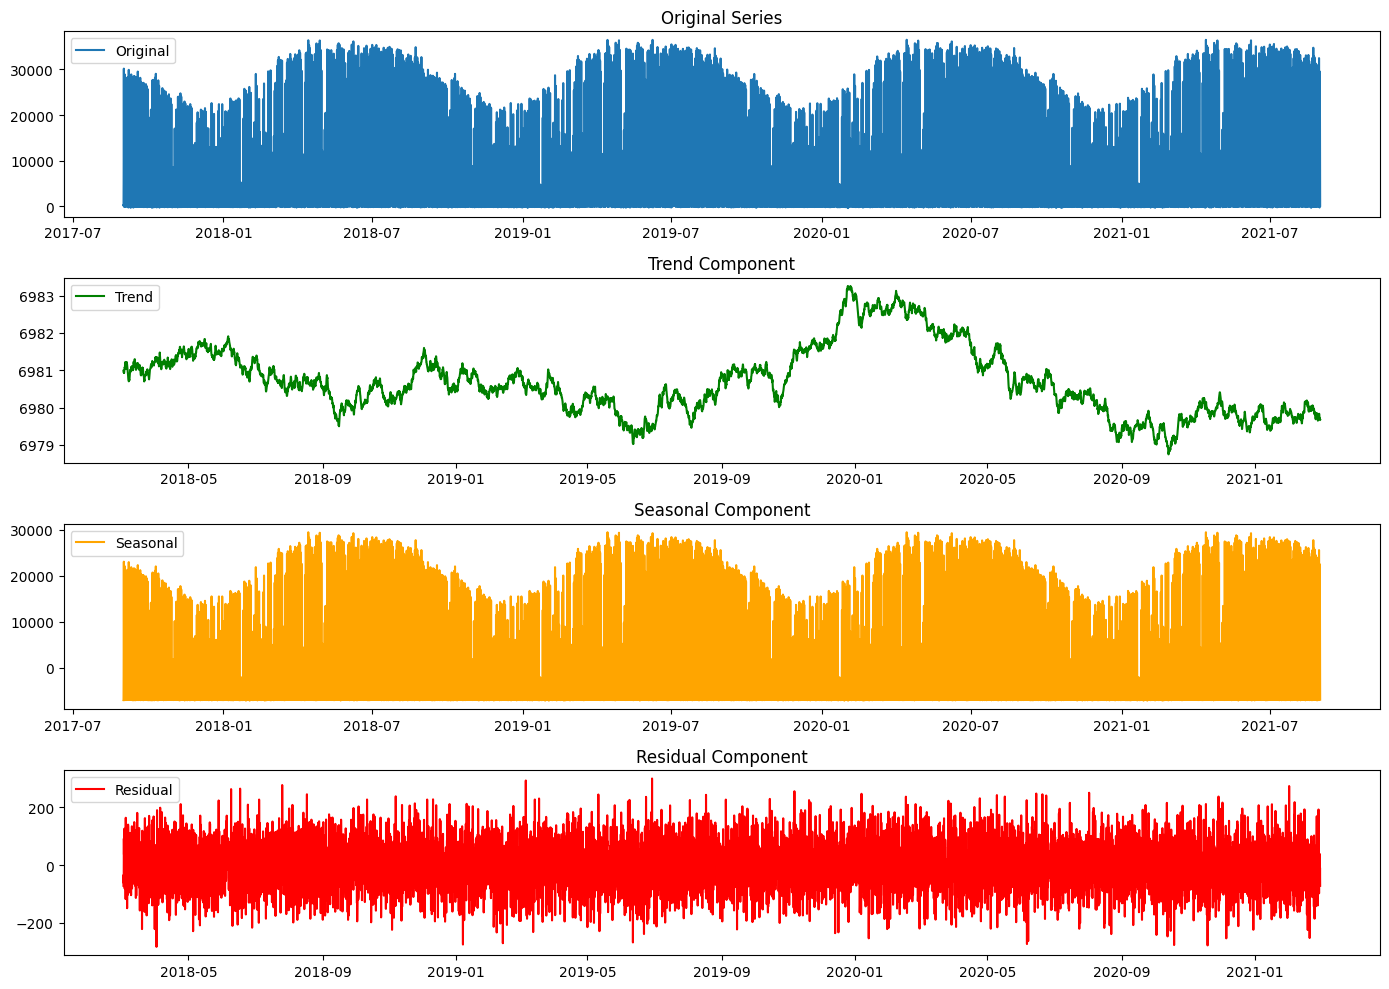

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series, model='additive', period=8*365)  # тут 'period=24' - добова сезонність (24 години)

# Побудова графіків для кожної компоненти
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original')
plt.title('Original Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

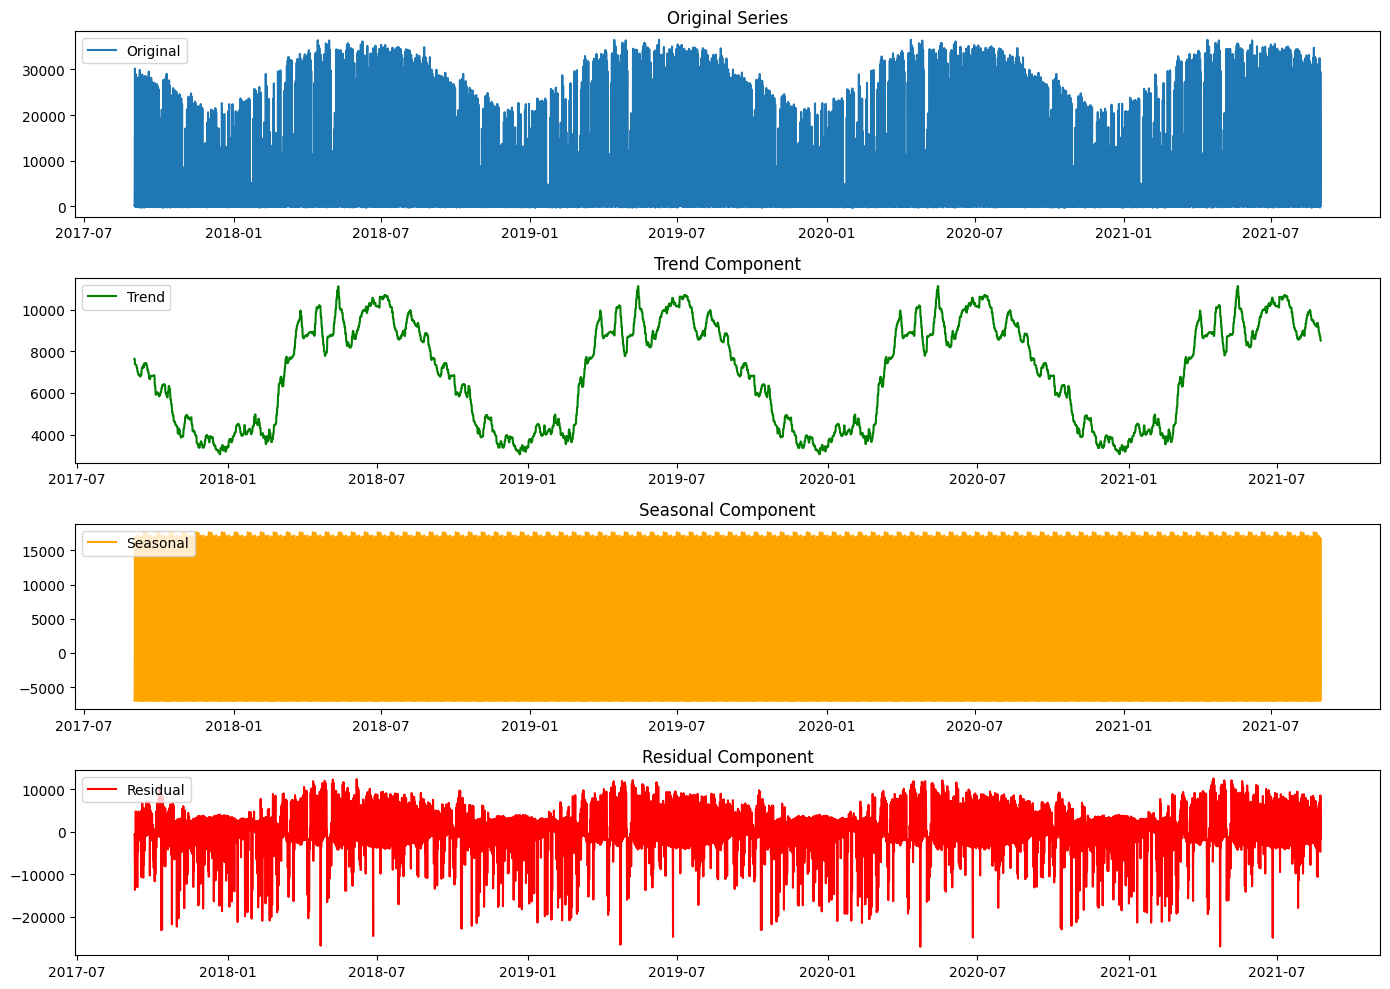

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series, model='additive', period=128)

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original')
plt.title('Original Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# **ExponentialSmoothing**

In [195]:
data = df_augmented.resample('M').mean()
data.head()

/tmp/ipykernel_30/1232411083.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_augmented.resample('M').mean()


,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-30,0.484663,65.300000,28.066667,9.563333,1.420833,9.925000,70.616667,9.516667,29.899542,7517.553863
2017-10-31,0.537176,63.419355,27.064516,9.264516,1.391129,9.657258,66.560484,9.129032,30.033468,5621.283288
2017-11-30,0.592815,58.000000,23.200000,6.523333,2.083333,9.137500,78.637500,6.389121,30.098708,4135.862115
2017-12-31,0.625090,49.129032,21.290323,6.719355,2.314516,8.810484,78.657258,6.685484,30.093266,3541.659131
2018-01-31,0.605873,51.483871,15.838710,4.864516,1.637097,8.733871,73.342742,4.931452,30.198710,4026.382496


In [196]:
target = data['Power Generated']
target.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2017-09-30 to 2021-08-31
Freq: ME
Series name: Power Generated
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [197]:
size = int(len(target) * 0.8)
train, test = target[0:size], target[size:len(target)]

In [198]:
train.shape, test.shape

((38,), (10,))

In [199]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


model = ExponentialSmoothing(train, 
                             seasonal='add', 
                             seasonal_periods=12)
model_fitted = model.fit()

In [200]:
forecast = model_fitted.forecast(steps=len(test))

In [231]:
forecast, test

(2020-11-22    4209.469336
 2020-11-29    3477.288726
 2020-12-06    4328.887905
 2020-12-13    4146.909618
 2020-12-20    3690.872646
 2020-12-27    3627.659008
 2021-01-03    3590.697704
 2021-01-10    3553.745472
 2021-01-17    3517.173519
 2021-01-24    3480.977932
 2021-01-31    3445.154837
 2021-02-07    3409.700401
 2021-02-14    3374.610830
 2021-02-21    3339.882370
 2021-02-28    3305.511304
 2021-03-07    3271.493954
 2021-03-14    3237.826680
 2021-03-21    3204.505879
 2021-03-28    3171.527986
 2021-04-04    3138.889471
 2021-04-11    3106.586843
 2021-04-18    3074.616645
 2021-04-25    3042.975455
 2021-05-02    3011.659888
 2021-05-09    2980.666592
 2021-05-16    2949.992252
 2021-05-23    2919.633584
 2021-05-30    2889.587340
 2021-06-06    2859.850306
 2021-06-13    2830.419298
 2021-06-20    2801.291168
 2021-06-27    2772.462798
 2021-07-04    2743.931104
 2021-07-11    2715.693032
 2021-07-18    2687.745561
 2021-07-25    2660.085701
 2021-08-01    2632.710490
 

In [202]:
size

38

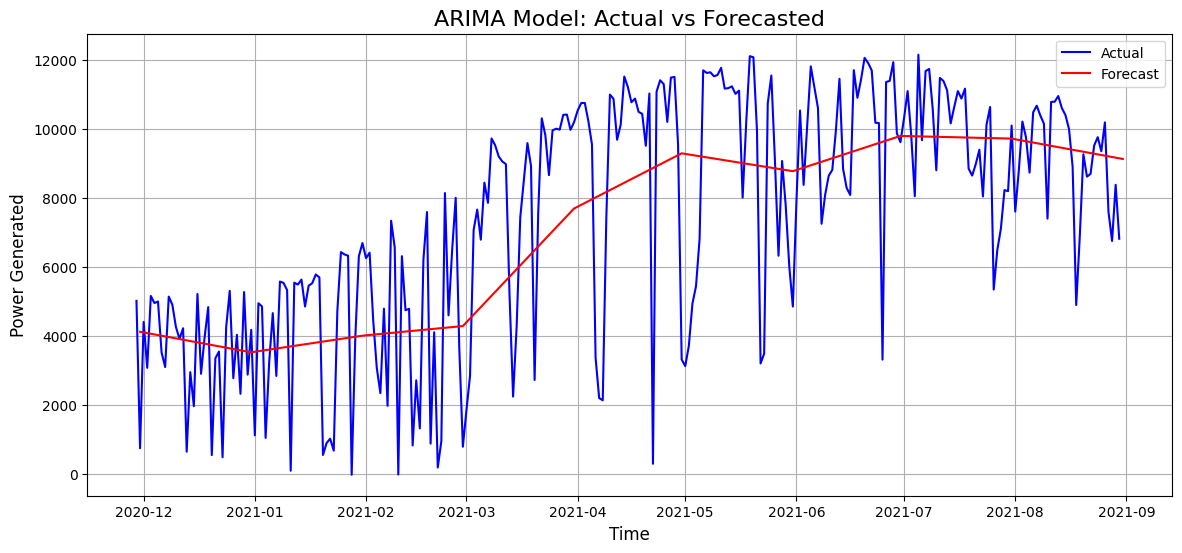

((275,), (275,))

In [203]:
clip = len(test)

predictions = forecast.resample('D').interpolate(method='linear')
test_resample = df_augmented['Power Generated'].resample('D').mean()

size = len(test_resample) - len(predictions)

test_plt = test_resample[size:]
forecast_plt = predictions

plt.figure(figsize=(14, 6))
plt.plot(test_plt.index, test_plt, label='Actual', color='blue')
plt.plot(forecast_plt.index, forecast_plt, label='Forecast', color='red')
plt.title('ARIMA Model: Actual vs Forecasted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Generated', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

test_plt.shape, forecast_plt.shape

In [205]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = test_plt
forecast = forecast_plt

mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)


print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 1936.3463581772148
mape - manual: 0.9046018146845933
rmse - manual: 2351.8418758452117
MAPE: 0.90%
R^2: 0.5234282462615918


## Arima model

In [237]:
data = df_augmented.resample('M').mean()
data.head()

/tmp/ipykernel_30/1232411083.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df_augmented.resample('M').mean()


,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-30,0.484663,65.300000,28.066667,9.563333,1.420833,9.925000,70.616667,9.516667,29.899542,7517.553863
2017-10-31,0.537176,63.419355,27.064516,9.264516,1.391129,9.657258,66.560484,9.129032,30.033468,5621.283288
2017-11-30,0.592815,58.000000,23.200000,6.523333,2.083333,9.137500,78.637500,6.389121,30.098708,4135.862115
2017-12-31,0.625090,49.129032,21.290323,6.719355,2.314516,8.810484,78.657258,6.685484,30.093266,3541.659131
2018-01-31,0.605873,51.483871,15.838710,4.864516,1.637097,8.733871,73.342742,4.931452,30.198710,4026.382496


In [238]:
time_series = data['Power Generated']
time_series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2017-09-30 to 2021-08-31
Freq: ME
Series name: Power Generated
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [180]:
!pip install pmdarima

In [239]:
len(time_series)

48

In [240]:
size = int(len(time_series) * 0.8)
train, test = time_series[0:size], time_series[size:len(time_series)]

#exog = df[['Is Daylight', 'Sky Cover', 'Distance to Solar Noon', 'Visibility' , 'Relative Humidity']]
#train_exog, test_exog = exog[0:size], exog[size:len(time_series)]

In [241]:
import pmdarima as pm

#exog = 
auto_arima = pm.auto_arima(train,
                           #exog=exog,
                           information_criterion = 'bic',
                           start_p = 5, start_q = 7,
                           max_p=7, max_q=15,
                           m=12,
                           start_P=1,
                           trace=True,
                           error_action='ignore',
                           supperess_warning=True,
                           stepwise=True, 
                           seasonal=True)

Performing stepwise search to minimize bic
 ARIMA(5,0,7)(1,1,1)[12] intercept   : BIC=inf, Time=4.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : BIC=318.714, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : BIC=322.079, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : BIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : BIC=315.535, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : BIC=321.969, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : BIC=321.970, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : BIC=325.198, Time=0.22 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : BIC=318.822, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : BIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : BIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 5.950 seconds


In [242]:
forecast_test = auto_arima.predict(n_periods=len(test))

forecast_test, test

(2020-11-30    4130.340125
 2020-12-31    3537.928440
 2021-01-31    4019.736769
 2021-02-28    4228.338911
 2021-03-31    7917.179627
 2021-04-30    9157.744489
 2021-05-31    8840.713599
 2021-06-30    9931.495922
 2021-07-31    9749.140354
 2021-08-31    9140.800247
 Freq: ME, dtype: float64,
 2020-11-30    4134.068082
 2020-12-31    3647.973910
 2021-01-31    4101.251151
 2021-02-28    4124.891617
 2021-03-31    7917.316514
 2021-04-30    9162.294812
 2021-05-31    8848.022591
 2021-06-30    9925.887361
 2021-07-31    9750.749313
 2021-08-31    9120.792783
 Freq: ME, Name: Power Generated, dtype: float64)

In [244]:
import statsmodels.api as sm

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_exog = scaler.fit_transform(train_exog)

NameError: name 'train_exog' is not defined

In [246]:
p, d, q = 1, 0, 1
P, D, Q, m = 1, 0, 1, 12

model = sm.tsa.SARIMAX(train,
                       #exog=scaled_exog,
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, m))

In [247]:
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61118D+00    |proj g|=  5.90532D-01

At iterate    5    f=  8.39288D+00    |proj g|=  6.60021D-02

At iterate   10    f=  8.37444D+00    |proj g|=  1.81415D-02

At iterate   15    f=  8.36729D+00    |proj g|=  1.23727D-03

At iterate   20    f=  8.36683D+00    |proj g|=  6.56884D-03

At iterate   25    f=  8.29678D+00    |proj g|=  2.11296D-01

At iterate   30    f=  8.01166D+00    |proj g|=  2.41653D-02

At iterate   35    f=  8.00141D+00    |proj g|=  8.97364D-03

At iterate   40    f=  7.57189D+00    |proj g|=  1.64162D-02

At iterate   45    f=  7.48459D+00    |proj g|=  9.25937D-02

At iterate   50    f=  7.41421D+00    |proj g|=  7.96793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [248]:
#scaled_exog_test = scaler.fit_transform(test_exog)

forecast = model_fit.forecast(len(test))
forecast = np.clip(forecast, a_min=0, a_max=None)

forecast, test

(2020-11-30     4115.248571
 2020-12-31     3545.956089
 2021-01-31     4009.811699
 2021-02-28     4194.206475
 2021-03-31     8024.979713
 2021-04-30     9071.874498
 2021-05-31     8849.713432
 2021-06-30    10003.696826
 2021-07-31     9742.462622
 2021-08-31     9138.014998
 Freq: ME, Name: predicted_mean, dtype: float64,
 2020-11-30    4134.068082
 2020-12-31    3647.973910
 2021-01-31    4101.251151
 2021-02-28    4124.891617
 2021-03-31    7917.316514
 2021-04-30    9162.294812
 2021-05-31    8848.022591
 2021-06-30    9925.887361
 2021-07-31    9750.749313
 2021-08-31    9120.792783
 Freq: ME, Name: Power Generated, dtype: float64)

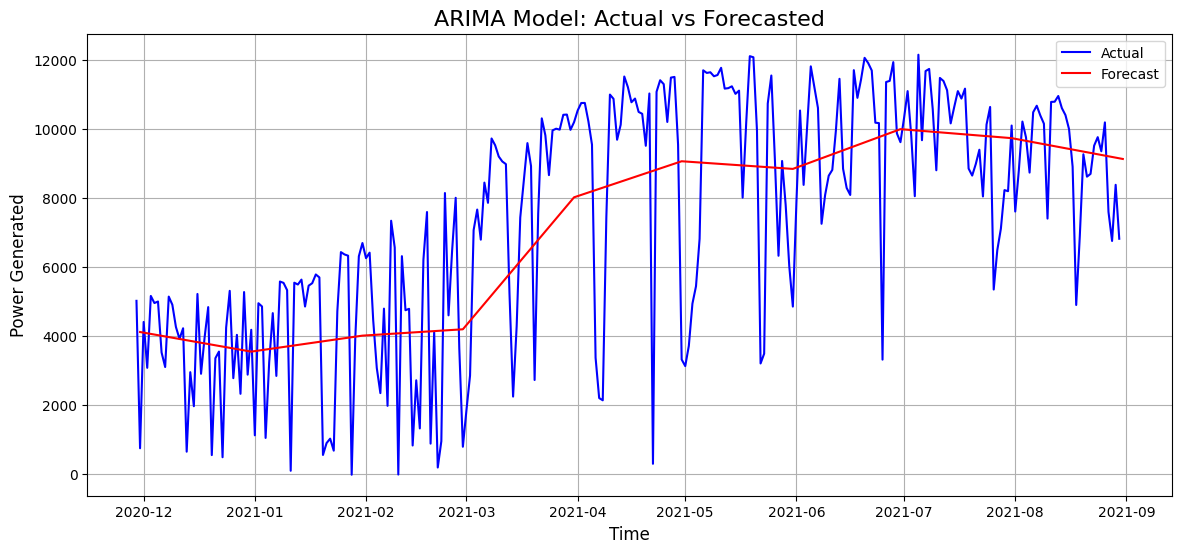

((275,), (275,))

In [249]:
clip = len(test)

predictions = forecast.resample('D').interpolate(method='linear')
test_resample = df_augmented['Power Generated'].resample('D').mean()

size = len(test_resample) - len(predictions)

test_plt = test_resample[size:]
forecast_plt = predictions

plt.figure(figsize=(14, 6))
plt.plot(test_plt.index, test_plt, label='Actual', color='blue')
plt.plot(forecast_plt.index, forecast_plt, label='Forecast', color='red')
plt.title('ARIMA Model: Actual vs Forecasted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Generated', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

test_plt.shape, forecast_plt.shape

In [252]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = test_plt
forecast = forecast_plt

mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 1918.4265697056437
mape - manual: 0.9054846708400556
rmse - manual: 2332.321441749788
MAPE: 0.91%
R^2: 0.5313065652359878


# **LSTM model for Solar forecasting**

In [253]:
df = df_augmented

df

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2017-09-01 01:00:00,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,219.400519
2017-09-01 04:00:00,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,104.020891
2017-09-01 07:00:00,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5509.415363
2017-09-01 10:00:00,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25516.477206
2017-09-01 13:00:00,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30176.849640
...,...,...,...,...,...,...,...,...,...,...
2021-08-30 10:00:00,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6928.439014
2021-08-30 13:00:00,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29525.411418
2021-08-30 16:00:00,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17204.626220
2021-08-30 19:00:00,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,743.750726


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11680 entries, 2017-09-01 01:00:00 to 2021-08-30 22:00:00
Freq: 3h
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Distance to Solar Noon                11680 non-null  float64
 1   Average Temperature (Day)             11680 non-null  int64  
 2   Average Wind Direction (Day)          11680 non-null  int64  
 3   Average Wind Speed (Day)              11680 non-null  float64
 4   Sky Cover                             11680 non-null  int64  
 5   Visibility                            11680 non-null  float64
 6   Relative Humidity                     11680 non-null  int64  
 7   Average Wind Speed (Period)           11676 non-null  float64
 8   Average Barometric Pressure (Period)  11680 non-null  float64
 9   Power Generated                       11680 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 

In [255]:
df['Average Wind Speed (Period)'].isnull().sum()

4

In [256]:
df['Average Wind Speed (Period)'].fillna(df['Average Wind Speed (Period)'].mean(), inplace=True)

/tmp/ipykernel_30/3664145250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Wind Speed (Period)'].fillna(df['Average Wind Speed (Period)'].mean(), inplace=True)


In [257]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a Min-Max Scaler
scaler = MinMaxScaler()

# List of features to normalize
features_to_scale = [
    'Distance to Solar Noon', 'Average Temperature (Day)', 
    'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 
    'Sky Cover', 'Visibility', 'Relative Humidity', 
    'Average Wind Speed (Period)', 'Average Barometric Pressure (Period)'
]

# Apply scaling
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [258]:
selected_features = [
    'Distance to Solar Noon', 'Average Temperature (Day)', 
    'Average Wind Speed (Period)', 'Relative Humidity',
    'Sky Cover', 'Visibility'
]
target = 'Power Generated'

X = df[selected_features]
y = df[target]

In [259]:
from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [260]:
X_train.info(), y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9344 entries, 2017-09-01 01:00:00 to 2020-11-11 22:00:00
Freq: 3h
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Distance to Solar Noon       9344 non-null   float64
 1   Average Temperature (Day)    9344 non-null   float64
 2   Average Wind Speed (Period)  9344 non-null   float64
 3   Relative Humidity            9344 non-null   float64
 4   Sky Cover                    9344 non-null   float64
 5   Visibility                   9344 non-null   float64
dtypes: float64(6)
memory usage: 511.0 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 9344 entries, 2017-09-01 01:00:00 to 2020-11-11 22:00:00
Freq: 3h
Series name: Power Generated
Non-Null Count  Dtype  
--------------  -----  
9344 non-null   float64
dtypes: float64(1)
memory usage: 146.0 KB


(None, None)

In [261]:
X_train

,Distance to Solar Noon,Average Temperature (Day),Average Wind Speed (Period),Relative Humidity,Sky Cover,Visibility
2017-09-01 01:00:00,0.742003,0.75,0.200,0.709302,0.00,1.0
2017-09-01 04:00:00,0.529931,0.75,0.125,0.732558,0.00,1.0
2017-09-01 07:00:00,0.317859,0.75,0.000,0.651163,0.00,1.0
2017-09-01 10:00:00,0.105786,0.75,0.000,0.220930,0.00,1.0
2017-09-01 13:00:00,0.013888,0.75,0.075,0.081395,0.00,1.0
...,...,...,...,...,...,...
2020-11-11 10:00:00,0.034548,0.50,0.125,0.848837,1.00,0.9
2020-11-11 13:00:00,0.142210,0.50,0.075,0.813953,0.75,0.9
2020-11-11 16:00:00,0.411365,0.50,0.400,0.848837,0.75,0.9
2020-11-11 19:00:00,0.680521,0.50,0.200,0.918605,0.75,1.0


In [262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9344 entries, 2017-09-01 01:00:00 to 2020-11-11 22:00:00
Freq: 3h
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Distance to Solar Noon       9344 non-null   float64
 1   Average Temperature (Day)    9344 non-null   float64
 2   Average Wind Speed (Period)  9344 non-null   float64
 3   Relative Humidity            9344 non-null   float64
 4   Sky Cover                    9344 non-null   float64
 5   Visibility                   9344 non-null   float64
dtypes: float64(6)
memory usage: 511.0 KB


In [263]:
scaler = MinMaxScaler()

y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train.values.reshape(-1, 1)))

y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [264]:
def create_sequences(X, y, time_steps=24):
    X_lag, y_lag = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        X_lag.append(v)        
        y_lag.append(y.iloc[i + time_steps])
    return np.array(X_lag), np.array(y_lag)

# Prepare sequences
time_steps = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test,  pd.DataFrame(y_test_scaled), time_steps)

In [265]:
print("Training Data Shape:", X_train_seq.shape)
print("Test Data Shape:", X_test_seq.shape)

Training Data Shape: (9320, 24, 6)
Test Data Shape: (2312, 24, 6)


In [290]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(units=32),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(
    optimizer=keras.optimizers.Adam(0.001), 
    loss='mean_squared_error'
)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 24, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [291]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [292]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=50,
    batch_size=24,
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0640 - val_loss: 0.0423
Epoch 2/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0237 - val_loss: 0.0393
Epoch 3/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0180 - val_loss: 0.0412
Epoch 4/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0173 - val_loss: 0.0429
Epoch 5/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0174 - val_loss: 0.0437
Epoch 6/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0174 - val_loss: 0.0374
Epoch 7/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0160 - val_loss: 0.0355
Epoch 8/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0164 - val_loss: 0.0356
Epoch 9/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0161 - val_loss: 0.0314
Epoch 10/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0156 - val_loss: 0.0326
Epoch 11/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0154 - val_loss: 0.0360
Epoch 12/50
311/311 ━━━━━━━━━━━━━━━━━━━━

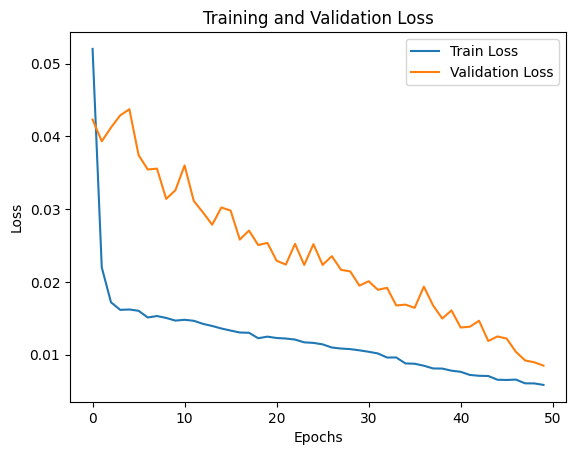

In [293]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [270]:
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

73/73 - 1s - 9ms/step - loss: 0.0312


TypeError: cannot unpack non-iterable float object

In [294]:
y_pred = model.predict(X_test_seq)
df_lstm_final = X_test[y_pred.shape[0]*-1:].copy()
df_lstm_final['Prediction'] = y_pred[:,0]

df_lstm_final_test = X_test[y_test_scaled.shape[0]*-1:].copy()
df_lstm_final['Prediction_test'] = y_test_scaled[:2312]

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [295]:
df_lstm_final

,Distance to Solar Noon,Average Temperature (Day),Average Wind Speed (Period),Relative Humidity,Sky Cover,Visibility,Prediction,Prediction_test
2020-11-15 01:00:00,0.855274,0.583333,0.000,0.709302,0.00,1.0,0.012065,0.009764
2020-11-15 04:00:00,0.582560,0.583333,0.000,0.883721,0.25,1.0,0.016845,0.008323
2020-11-15 07:00:00,0.309845,0.583333,0.000,0.883721,0.00,1.0,0.117765,0.039771
2020-11-15 10:00:00,0.037131,0.583333,0.075,0.744186,0.00,0.8,0.552144,0.497387
2020-11-15 13:00:00,0.143186,0.583333,0.200,0.686047,0.25,0.8,0.607315,0.621297
...,...,...,...,...,...,...,...,...
2021-08-30 10:00:00,0.106376,0.583333,0.250,0.709302,1.00,1.0,0.464133,0.663189
2021-08-30 13:00:00,0.012484,0.583333,0.375,0.604651,0.25,1.0,0.615220,0.610271
2021-08-30 16:00:00,0.223742,0.583333,0.525,0.627907,0.50,1.0,0.314873,0.260911
2021-08-30 19:00:00,0.434999,0.583333,0.425,0.779070,0.50,1.0,-0.005950,0.020822


In [296]:
df_lstm_final['Prediction'] = df_lstm_final['Prediction'].where(df_lstm_final['Prediction'] >= 0, 0)

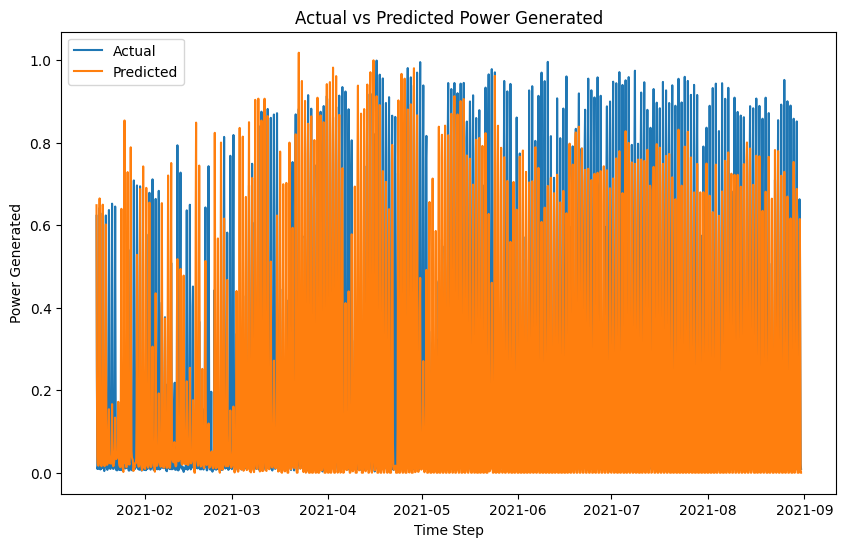

In [297]:
plt.figure(figsize=(10, 6))
plt.plot(df_lstm_final['Prediction_test'][500:], label='Actual')
plt.plot(df_lstm_final['Prediction'][500:], label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Power Generated')
plt.legend()
plt.title('Actual vs Predicted Power Generated')
plt.show()

In [298]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = df_lstm_final['Prediction_test']
forecast = df_lstm_final['Prediction']

mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 0.08574035976207287
mape - manual: 0.01806294764970257
rmse - manual: 0.1541653038205352
MAPE: 0.02%
R^2: 0.7102943052646742


In [299]:
errors = X_test[y_pred.shape[0]*-1:].copy()
errors['Error'] = abs(df_lstm_final['Prediction'] - df_lstm_final['Prediction_test'])

largest_errors = errors.sort_values(by='Error', ascending=False).head(10)

print(largest_errors['Error'])

2021-04-25 13:00:00    0.943635
2021-04-22 13:00:00    0.845741
2021-04-10 13:00:00    0.755390
2021-03-03 13:00:00    0.751414
2021-04-25 10:00:00    0.736277
2021-02-17 13:00:00    0.736263
2021-04-22 10:00:00    0.735214
2021-01-25 13:00:00    0.734596
2021-01-31 13:00:00    0.732952
2021-03-23 13:00:00    0.714610
Name: Error, dtype: float64


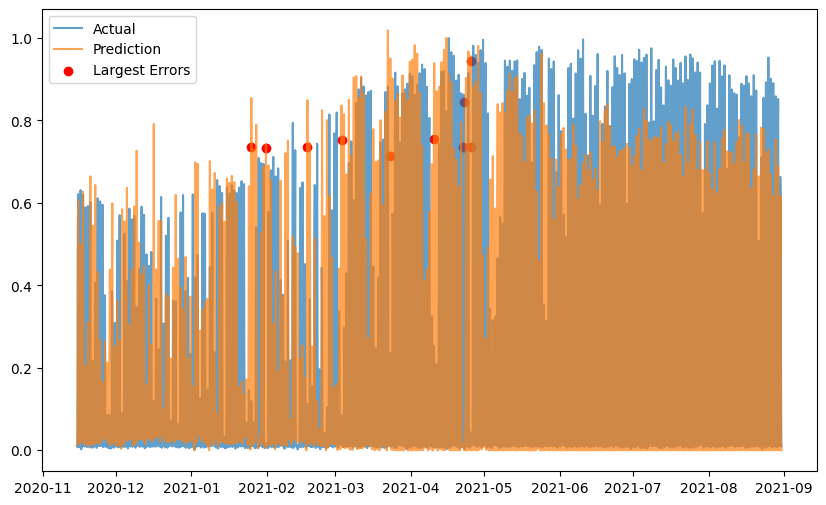

In [300]:
plt.figure(figsize=(10, 6))
plt.plot(df_lstm_final['Prediction_test'], label='Actual', alpha=0.7)
plt.plot(df_lstm_final['Prediction'], label='Prediction', alpha=0.7)
plt.scatter(largest_errors.index, largest_errors['Error'], color='red', label='Largest Errors')
plt.legend()
plt.show()

In [88]:
largest_errors['Error']

Timestamp
2009-06-29 13:00:00    0.796338
2009-06-29 10:00:00    0.677872
2009-05-26 10:00:00    0.673340
2009-05-27 10:00:00    0.653454
2009-05-27 13:00:00    0.572765
2009-05-26 13:00:00    0.523137
2009-06-20 10:00:00    0.450645
2009-07-30 10:00:00    0.444028
2009-06-11 13:00:00    0.441166
2009-08-23 10:00:00    0.435594
Name: Error, dtype: float64

# **LSTM with attention model for Solar forecasting**

In [301]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dot, Activation, Concatenate, Flatten, Dropout
import tensorflow as tf

In [302]:
# Побудова моделі
input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

# LSTM-шар
lstm_out, state_h, state_c = LSTM(128, return_sequences=True, return_state=True)(input_layer)

lstm_out = Dropout(0.1)(lstm_out)

In [303]:
# Механізм уваги
attention = Dense(1, activation='tanh')(lstm_out)
attention = Activation('softmax', name='attention_weights')(attention)
context_vector = Dot(axes=1)([attention, lstm_out])

In [304]:
from tensorflow.keras.layers import Lambda

state_h_expanded = Lambda(lambda x: tf.expand_dims(x, axis=1))(state_h)

# Конкатенація контекстного вектора і станів LSTM
context_and_hidden = Concatenate()([context_vector, state_h_expanded])

In [305]:
from tensorflow import keras

context_and_hidden_flat = Flatten()(context_and_hidden)

# Вихідний шар
output = Dense(1)(context_and_hidden)

# Модель
model = Model(inputs=input_layer, outputs=output)
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

In [306]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [316]:
history = model.fit(
    X_train_seq, y_train_seq, 
    epochs=50, 
    batch_size=24, 
    validation_split=0.2,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0051 - val_loss: 0.0105
Epoch 2/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0049 - val_loss: 0.0093
Epoch 3/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0047 - val_loss: 0.0093
Epoch 4/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 5/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0046 - val_loss: 0.0103
Epoch 6/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0047 - val_loss: 0.0100
Epoch 7/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0050 - val_loss: 0.0113
Epoch 8/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0049 - val_loss: 0.0112
Epoch 9/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 10/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0045 - val_loss: 0.0111


In [310]:
y_pred = model.predict(X_test_seq)
df_lstm_final = X_test[y_pred.shape[0]*-1:].copy()
df_lstm_final['Prediction'] = y_pred[:,0]

df_lstm_final_test = X_test[y_test_scaled.shape[0]*-1:].copy()
df_lstm_final['Prediction_test'] = y_test_scaled[:2312]

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [311]:
df_lstm_final

,Distance to Solar Noon,Average Temperature (Day),Average Wind Speed (Period),Relative Humidity,Sky Cover,Visibility,Prediction,Prediction_test
2020-11-15 01:00:00,0.855274,0.583333,0.000,0.709302,0.00,1.0,0.012842,0.009764
2020-11-15 04:00:00,0.582560,0.583333,0.000,0.883721,0.25,1.0,-0.033022,0.008323
2020-11-15 07:00:00,0.309845,0.583333,0.000,0.883721,0.00,1.0,0.032706,0.039771
2020-11-15 10:00:00,0.037131,0.583333,0.075,0.744186,0.00,0.8,0.520920,0.497387
2020-11-15 13:00:00,0.143186,0.583333,0.200,0.686047,0.25,0.8,0.631533,0.621297
...,...,...,...,...,...,...,...,...
2021-08-30 10:00:00,0.106376,0.583333,0.250,0.709302,1.00,1.0,0.355126,0.663189
2021-08-30 13:00:00,0.012484,0.583333,0.375,0.604651,0.25,1.0,0.581892,0.610271
2021-08-30 16:00:00,0.223742,0.583333,0.525,0.627907,0.50,1.0,0.394870,0.260911
2021-08-30 19:00:00,0.434999,0.583333,0.425,0.779070,0.50,1.0,-0.001354,0.020822


In [312]:
df_lstm_final['Prediction'] = df_lstm_final['Prediction'].where(df_lstm_final['Prediction'] >= 0, 0)

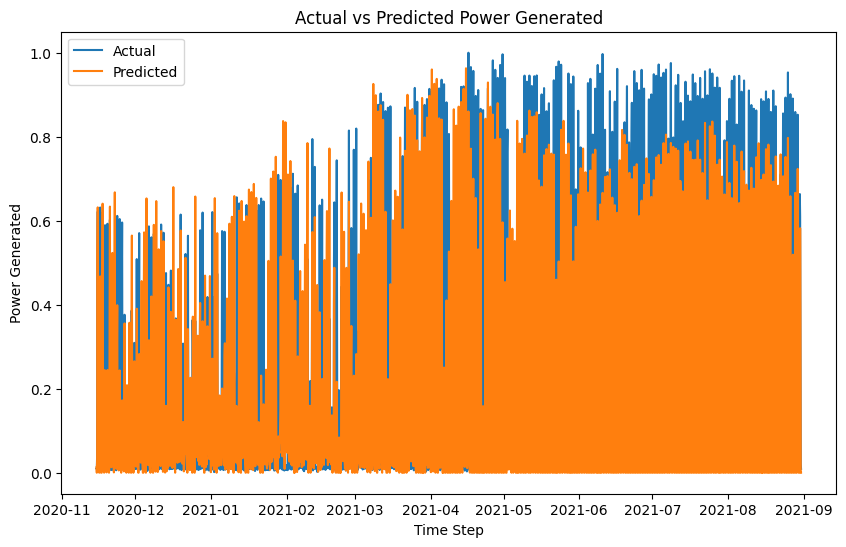

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(df_lstm_final['Prediction_test'], label='Actual')
plt.plot(df_lstm_final['Prediction'], label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Power Generated')
plt.legend()
plt.title('Actual vs Predicted Power Generated')
plt.show()

In [314]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = df_lstm_final['Prediction_test']
forecast = df_lstm_final['Prediction']

mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 0.0831890802160863
mape - manual: 0.017525468812352306
rmse - manual: 0.14467060453312794
MAPE: 0.02%
R^2: 0.7448800985826578
